## Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [2]:
# Dependencies to Visualize the model
# %matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
import os 
from os import listdir
from os.path import isfile, join

## Config OS ENV to allow GPU mememory be scaled for using

In [30]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

## Making prediction from existing custom made test files

In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image as image_processing

In [32]:
# load the trained model
model = load_model("./Trained_Model/final_model.h5")

# recompile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# define some colors for print-function
red = '\033[31m'
bolt = '\033[1m'
blu = '\033[34m'
prp = '\033[35m'
nc = '\033[0m'

In [36]:
def img_predict (img_path):
   
    img_name = img_path.split("/")[-1]
    print(f'{blu}Processing Image :: {prp}{img_name}{nc}')
    
    
    # use keras built in img processing to read input image
    image_size = (28, 28)
    img = image_processing.load_img(img_path,
                                    target_size=image_size,
                                    color_mode="grayscale")
    
    # convert raw img to np arrays
    image = img_to_array(img)
    
    # con2v takes an array of 4 parameters, need to expand to add
    # additional dimension to the image
    image /= 255
    plt.figure(figsize=(1,1))
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.Greys)
    plt.show()
    
    image = np.expand_dims(image, axis=0)
    
    # Invert the pixel values to match the original data
    # when Keras load the picture, the rgb values were inverted
    image = 1 - image
    
    prediction = np.argmax(model.predict(image), axis=-1)
    return print(f"This is number :: {red}{bolt}{prediction[0]}{nc}\n{('=')*40}")

Processing Image File Name :: 0.JPG


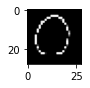

This is number :: 0
Processing Image File Name :: 1.jpg


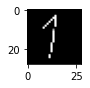

This is number :: 1
Processing Image File Name :: 2.jpg


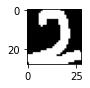

This is number :: 7
Processing Image File Name :: 3.jpg


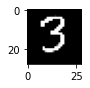

This is number :: 3
Processing Image File Name :: 3black.JPG


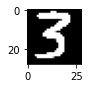

This is number :: 5
Processing Image File Name :: 3ct.JPG


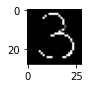

This is number :: 3
Processing Image File Name :: 3light-blue.JPG


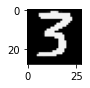

This is number :: 3
Processing Image File Name :: 3pink.JPG


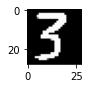

This is number :: 1
Processing Image File Name :: 3purple.JPG


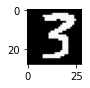

This is number :: 3
Processing Image File Name :: 3sk.JPG


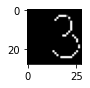

This is number :: 2
Processing Image File Name :: 5ct.JPG


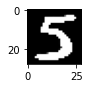

This is number :: 5
Processing Image File Name :: 5sk.JPG


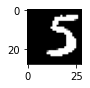

This is number :: 5
Processing Image File Name :: 6.JPG


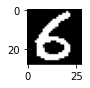

This is number :: 6
Processing Image File Name :: 7-off-ct.JPG


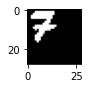

This is number :: 7
Processing Image File Name :: 7.JPG


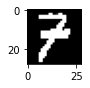

This is number :: 4
Processing Image File Name :: 7way-off-ct.JPG


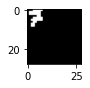

This is number :: 1
Processing Image File Name :: 8.jpg


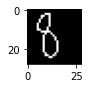

This is number :: 5
Processing Image File Name :: 9.jpeg


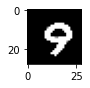

This is number :: 9
Processing Image File Name :: 9.jpg


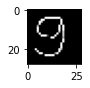

This is number :: 3
Processing Image File Name :: canvas3.png


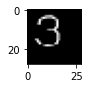

This is number :: 3
Processing Image File Name :: hand7-.JPG


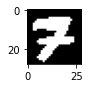

This is number :: 7
Processing Image File Name :: hand7.JPG


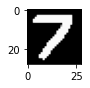

This is number :: 7
Processing Image File Name :: test0.png


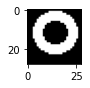

This is number :: 0
Processing Image File Name :: test2.png


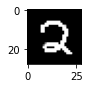

This is number :: 2
Processing Image File Name :: test5.png


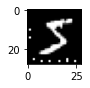

This is number :: 5
Processing Image File Name :: test8.png


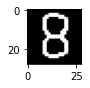

This is number :: 8
Processing Image File Name :: text7.JPG


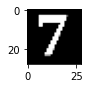

This is number :: 7


In [37]:
# create a list of all picture path inside test image folder
base_path = "./images/test-img/"
img_list = [base_path + img for img in listdir(base_path) if isfile(join(base_path, img))]

# looping thru each img and make prediction
for ea_iter in tf.range(len(img_list)):
    ea_iter = tf.cast(ea_iter, tf.int64)
    img_predict(img_list[ea_iter])

In [ ]:
# create a list of all picture path inside test image folder
base_path = "./images/test-img/num7-variant/"
img_list = [base_path + img for img in listdir(base_path) if isfile(join(base_path, img))]

# looping thru each img and make prediction
for ea_iter in tf.range(len(img_list)):
    ea_iter = tf.cast(ea_iter, tf.int64)
    img_predict(img_list[ea_iter])